<h1> 2023 Travelers Analytics Case Competition </h1>
<h3> InsNova Auto Insurance Company Modeling Problem </h3>

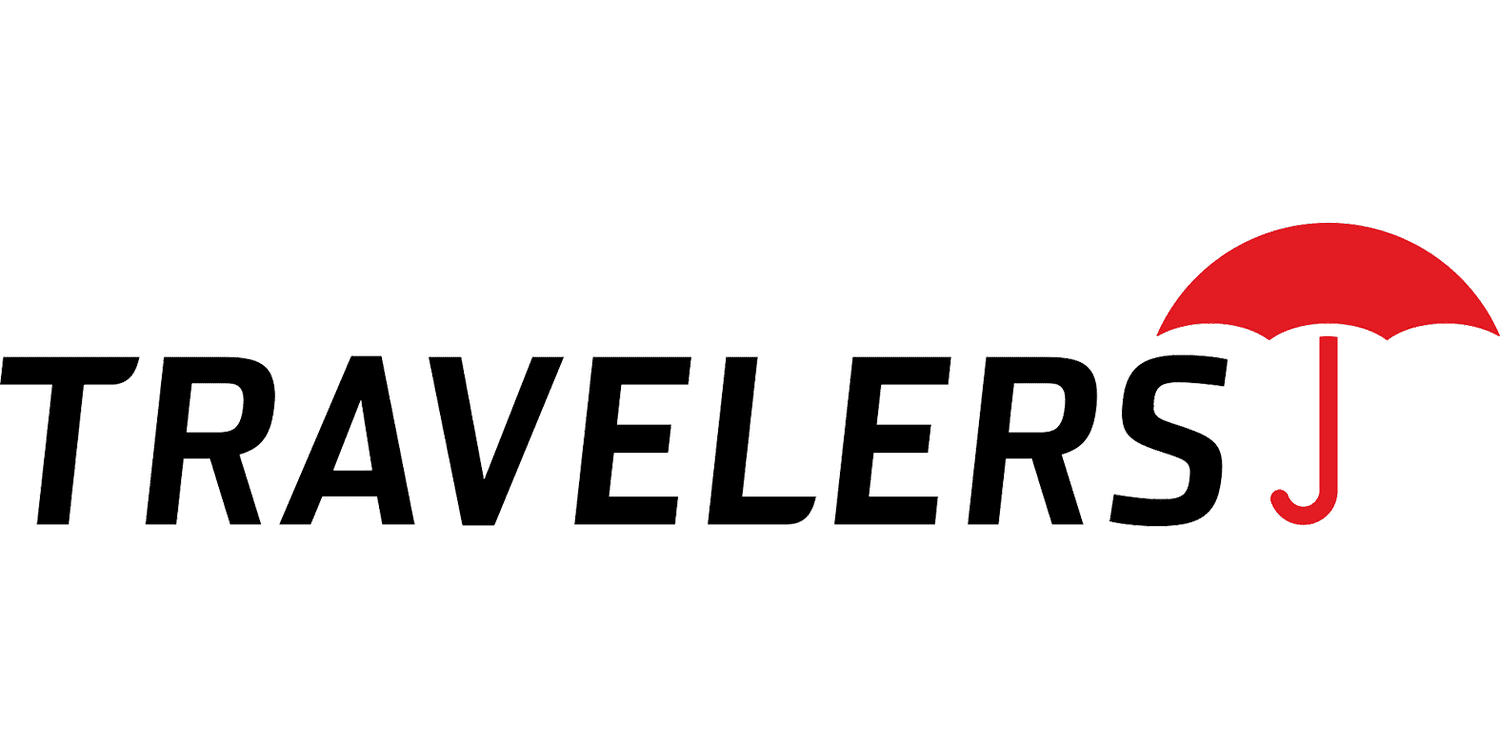



In [2]:
# Mounting Google Drive on Colab to get the data from Drive
from google.colab import drive
drive.mount('/content/mydrive')

Mounted at /content/mydrive


In [14]:
# Installing Catboost model for my analysis
!pip install catboost


In [15]:
!pip install autoviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.5/18.5 MB 45.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 358.9/358.9 kB 30.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 52.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 75.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 69.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.3/87.3 kB 8.3 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of panel to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.1/20.1 MB 90.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.4/20.4 MB 66.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.1/20.1 MB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.

In [21]:
!pip install sweetviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 42.4 MB/s eta 0:00:00


In [16]:
# Importing Necessary Libraries
# Mathematical libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing and metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, PowerTransformer, MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.feature_selection import mutual_info_regression

#Hyper parameter Tuning
from sklearn.model_selection import GridSearchCV

# Regression modeling Libraries
from sklearn.linear_model import LinearRegression, ElasticNet, ElasticNetCV,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import lightgbm as lgb
import catboost as cb
from sklearn.svm import SVR
from sklearn.metrics import r2_score

# Automated EDA

<p> 1. AutoViz</p>


In [19]:
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()
df_av = AV.AutoViz('/content/mydrive/MyDrive/Travellers - Data/2023-travelers-university-competition/InsNova_data_2023_train.csv')

Shape of your Data Set loaded: (22619, 22)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    22 Predictors classified...
        1 variable(s) removed since they were ID or low-information variables
        List of variables removed: ['id']
To fix data quality issues automatically, import FixDQ from autoviz...


,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
id,int64,0.000000,100,1.000000,22619.000000,Possible ID colum: drop before modeling process.
veh_value,float64,0.000000,NA,0.000000,24.510000,has 1414 outliers greater than upper bound (4.04) or lower than lower bound(-0.71). Cap them or remove them.
exposure,float64,0.000000,NA,0.001754,0.999378,No issue
veh_body,object,0.000000,0,nan,nan,"4 rare categories: ['MCARA', 'CONVT', 'BUS', 'RDSTR']. Group them into a single category or drop the categories."
veh_age,int64,0.000000,0,1.000000,4.000000,No issue
gender,object,0.000000,0,nan,nan,No issue
area,object,0.000000,0,nan,nan,No issue
agecat,int64,0.000000,0,1.000000,6.000000,No issue
engine_type,object,0.000000,0,nan,nan,No issue
max_power,int64,0.000000,1,60.000000,409.000000,has 638 outliers greater than upper bound (277.50) or lower than lower bound(17.50). Cap them or remove them.


Number of All Scatter Plots = 15
All Plots done
Time to run AutoViz = 8 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


<p> 2. SweetViz </p>

In [26]:
import sweetviz as sv
analyze_report = sv.analyze(df_train)
analyze_report.show_html('report.html', open_browser=False)

                                             |          | [  0%]   00:00 -> (? left)

Report report.html was generated.


# Data Collection

In [24]:
# Reading Data from Drive and
df_train = pd.read_csv('/content/mydrive/MyDrive/Travellers - Data/2023-travelers-university-competition/InsNova_data_2023_train.csv')
df_test = pd.read_csv('/content/mydrive/MyDrive/Travellers - Data/2023-travelers-university-competition/InsNova_data_2023_vh.csv')

In [6]:
df_train.head() # print first five rows of the training data

,id,veh_value,exposure,veh_body,veh_age,gender,area,agecat,engine_type,max_power,...,marital_status,e_bill,time_of_week_driven,time_driven,trm_len,credit_score,high_education_ind,clm,numclaims,claimcst0
0,1,0.77,0.444504,SEDAN,4,M,D,3,petrol,147,...,S,1,weekday,6pm - 12am,6,640.448137,1.0,0,0,0.0
1,2,4.45,0.562183,STNWG,1,M,A,3,petrol,158,...,S,1,weekday,6am - 12pm,12,683.749691,0.0,0,0,0.0
2,3,4.90,0.465244,STNWG,1,F,A,3,petrol,159,...,M,1,weekday,6pm - 12am,6,653.656117,1.0,0,0,0.0
3,4,0.48,0.271039,PANVN,4,M,A,4,petrol,80,...,S,1,weekday,12pm - 6pm,12,642.574671,0.0,0,0,0.0
4,5,0.85,0.141624,SEDAN,4,F,A,5,petrol,126,...,S,0,weekday,6am - 12pm,6,647.175035,0.0,0,0,0.0


In [27]:
df_train

,id,veh_value,exposure,veh_body,veh_age,gender,area,agecat,engine_type,max_power,driving_history_score,veh_color,marital_status,e_bill,time_of_week_driven,time_driven,trm_len,credit_score,high_education_ind,clm,numclaims,claimcst0
0,1,0.77,0.444504,SEDAN,4,M,D,3,petrol,147,67.0,black,S,1,weekday,6pm - 12am,6,640.448137,1.0,0,0,0.000000
1,2,4.45,0.562183,STNWG,1,M,A,3,petrol,158,76.0,white,S,1,weekday,6am - 12pm,12,683.749691,0.0,0,0,0.000000
2,3,4.90,0.465244,STNWG,1,F,A,3,petrol,159,58.0,black,M,1,weekday,6pm - 12am,6,653.656117,1.0,0,0,0.000000
3,4,0.48,0.271039,PANVN,4,M,A,4,petrol,80,72.0,white,S,1,weekday,12pm - 6pm,12,642.574671,0.0,0,0,0.000000
4,5,0.85,0.141624,SEDAN,4,F,A,5,petrol,126,91.0,white,S,0,weekday,6am - 12pm,6,647.175035,0.0,0,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22614,22615,3.71,0.580943,STNWG,2,F,B,2,petrol,154,92.0,gray,M,1,weekday,6pm - 12am,12,654.451512,0.0,1,1,280.403348
22615,22616,0.77,0.636641,SEDAN,4,F,C,6,petrol,160,74.0,white,M,1,weekday,12pm - 6pm,12,641.163999,0.0,0,0,0.000000
22616,22617,1.95,0.709227,HBACK,1,M,C,6,petrol,146,58.0,black,M,1,weekday,12am - 6 am,12,649.644433,0.0,1,2,1253.261110
22617,22618,3.80,0.600221,TRUCK,2,M,A,4,petrol,284,41.0,red,S,0,weekday,6pm - 12am,12,653.024119,0.0,0,0,0.000000


In [30]:
df_test.head() # print first five rows of the test data

,id,veh_value,exposure,veh_body,veh_age,gender,area,agecat,engine_type,max_power,driving_history_score,veh_color,marital_status,e_bill,time_of_week_driven,time_driven,trm_len,credit_score,high_education_ind
0,1,3.40,0.076279,STNWG,2,M,B,4,petrol,174,83,black,S,1,weekday,6pm - 12am,6,648.247594,0
1,2,2.55,0.093443,STNWG,2,F,A,3,petrol,181,65,yellow,M,0,weekday,12am - 6 am,12,637.752677,0
2,3,3.04,0.157762,STNWG,2,F,E,4,petrol,136,64,white,S,1,weekday,12pm - 6pm,12,661.483786,0
3,4,2.05,0.560735,MIBUS,4,M,C,6,dissel,164,82,gray,M,1,weekday,6am - 12pm,12,647.846365,0
4,5,1.93,0.258275,HBACK,2,M,C,4,dissel,89,48,black,S,0,weekday,6am - 12pm,12,640.257550,0


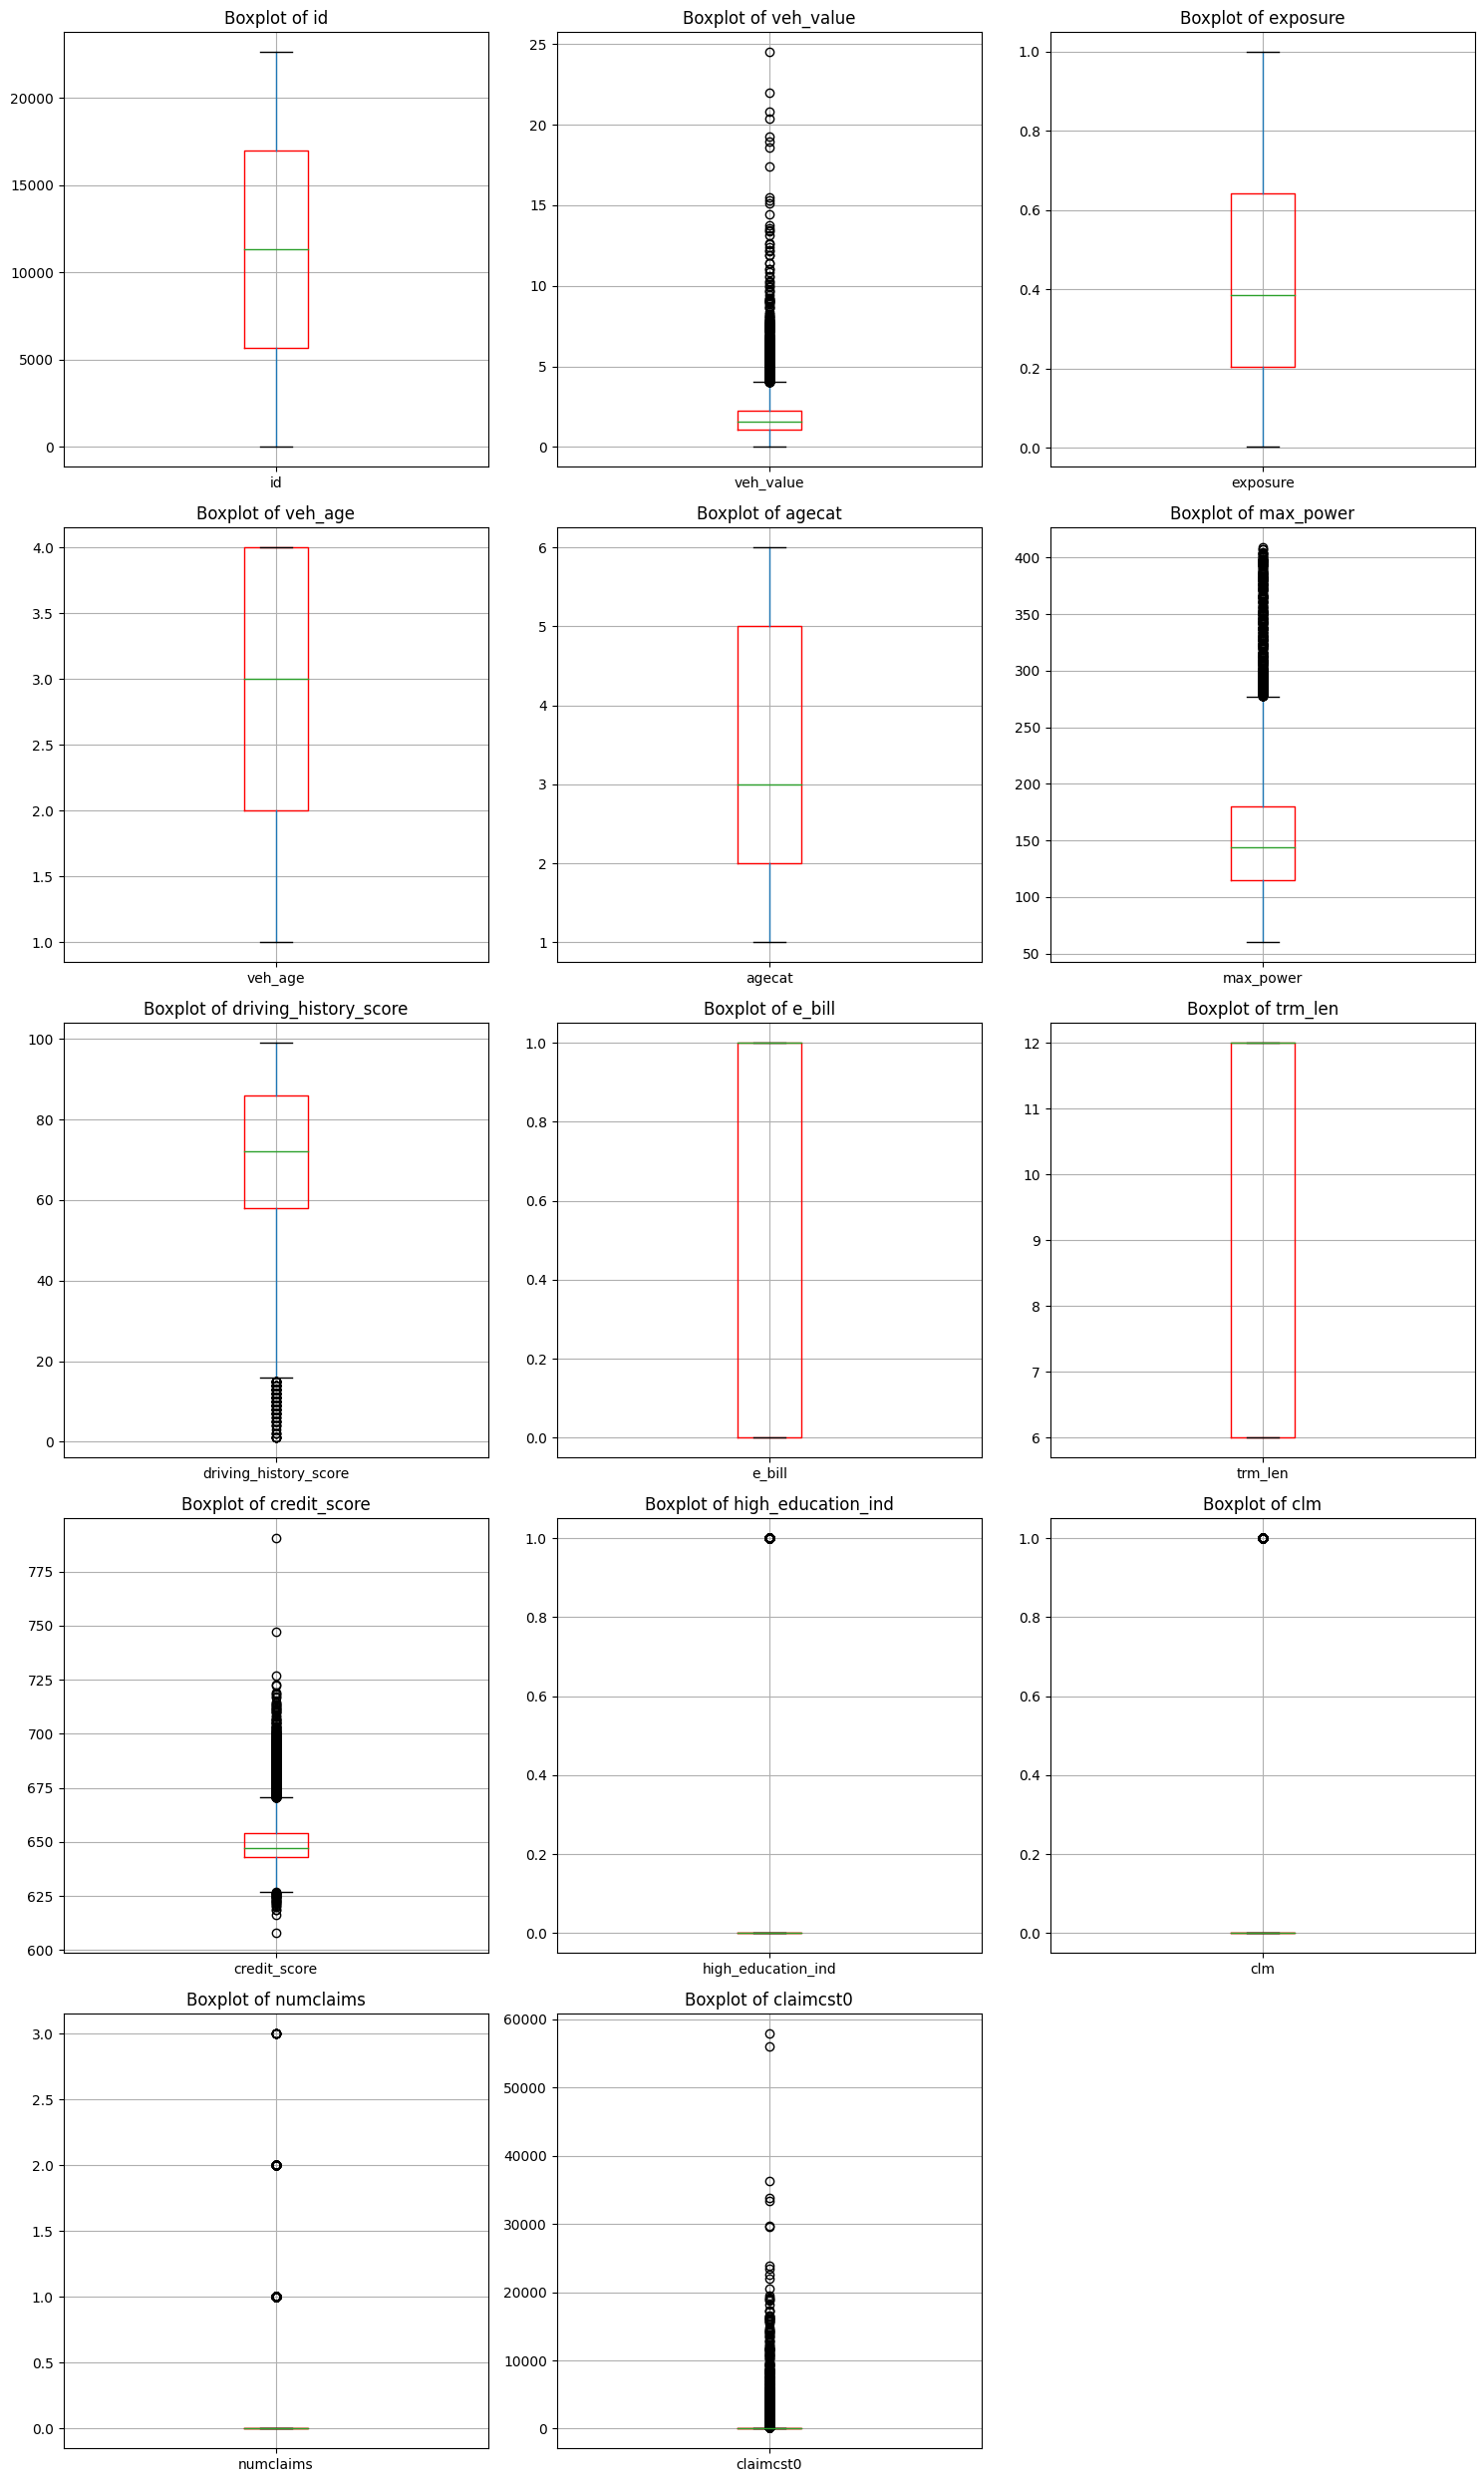

In [9]:
# Let's assume df is your DataFrame and you want to plot boxplots for all numerical columns
# First, we select only the numerical columns
numerical_df = df_train.select_dtypes(include=['number'])

# Determine the number of rows needed for subplots based on the number of numerical columns
num_cols = len(numerical_df.columns)
num_rows = num_cols // 3 + (num_cols % 3 > 0)  # 3 columns per row

# Create a figure and array of subplots with 3 columns
fig, axes = plt.subplots(num_rows, 3, figsize=(15, num_rows * 5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Create a boxplot on each subplot
for i, col in enumerate(numerical_df.columns):
    numerical_df.boxplot(column=[col], ax=axes[i], boxprops=dict(color="red"))
    axes[i].set_title(f'Boxplot of {col}')

# If there are any leftover subplots, turn them off
for j in range(i + 1, num_rows * 3):
    axes[j].set_visible(False)

# Adjust layout to prevent overlapping
plt.tight_layout()

# Display the figure with boxplots
plt.show()

In [31]:
# Shape of train and test data using shape method
x = df_train.shape
y = df_test.shape
print('Shape of training data : ',x, "  ", 'Shape of testing data : ',y)

Shape of training data :  (22619, 22)    Shape of testing data :  (22620, 19)


# Data Cleaning and Preprocessing

In [32]:
# Descriptive Analysis of the data(Mean, Mode, Median, SD, Variance)
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,22619.0,11310.000000,6529.687205,1.000000,5655.500000,11310.000000,16964.500000,22619.000000
veh_value,22619.0,1.868948,1.278588,0.000000,1.070000,1.570000,2.260000,24.510000
exposure,22619.0,0.433038,0.272899,0.001754,0.203696,0.384313,0.643316,0.999378
veh_age,22619.0,2.667492,1.070555,1.000000,2.000000,3.000000,4.000000,4.000000
agecat,22619.0,3.481675,1.420252,1.000000,2.000000,3.000000,5.000000,6.000000
max_power,22619.0,152.447765,51.834156,60.000000,115.000000,144.000000,180.000000,409.000000
driving_history_score,22619.0,70.868341,19.083318,1.000000,58.000000,72.000000,86.000000,99.000000
e_bill,22619.0,0.636810,0.480930,0.000000,0.000000,1.000000,1.000000,1.000000
trm_len,22619.0,10.493833,2.601685,6.000000,6.000000,12.000000,12.000000,12.000000
credit_score,22619.0,649.875077,10.515364,607.797435,643.134748,647.180197,654.069205,790.360253


In [33]:
# Getting the basic information about columns such as non - null values and Data-types
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22619 entries, 0 to 22618
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     22619 non-null  int64  
 1   veh_value              22619 non-null  float64
 2   exposure               22619 non-null  float64
 3   veh_body               22619 non-null  object 
 4   veh_age                22619 non-null  int64  
 5   gender                 22619 non-null  object 
 6   area                   22619 non-null  object 
 7   agecat                 22619 non-null  int64  
 8   engine_type            22619 non-null  object 
 9   max_power              22619 non-null  int64  
 10  driving_history_score  22619 non-null  float64
 11  veh_color              22619 non-null  object 
 12  marital_status         22619 non-null  object 
 13  e_bill                 22619 non-null  int64  
 14  time_of_week_driven    22619 non-null  object 
 15  ti

<ipython-input-34-d3b179ca5e8a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_train.corr()


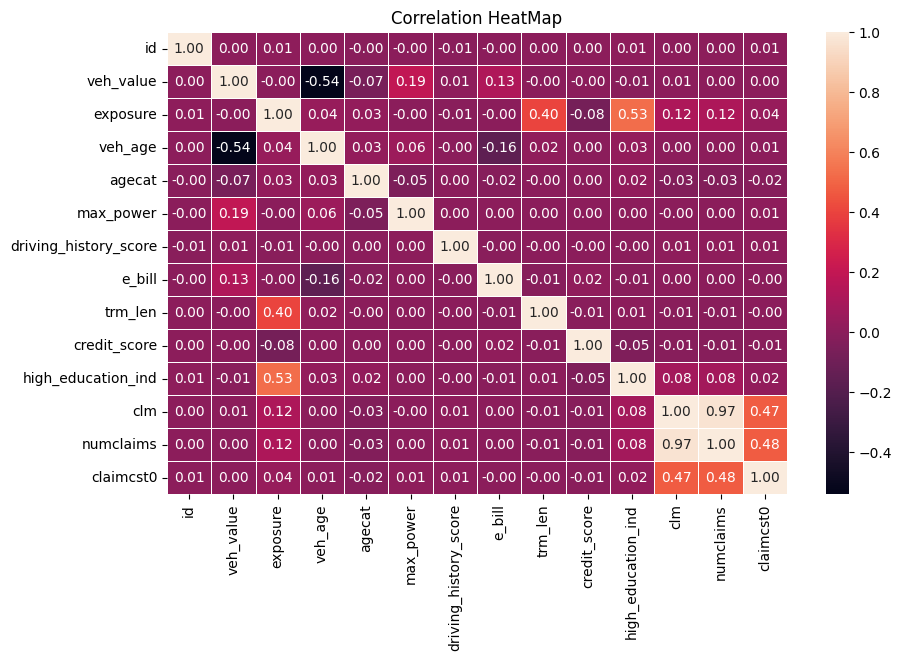

In [34]:
# Correlation Matrix to represent relation between columns and target variable (claim cost)
corr_matrix = df_train.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix,annot=True, fmt=".2f", linewidths=0.5)
plt.title("Correlation HeatMap")
plt.show()

* Col 'clm' and 'numclaims' are positively correlated having a correlation of 0.97, which could be useful in feature selection. We can drop one or both so that it wont impact our analysis

In [35]:
# Checking Null values in training and testing data
print("Total number of Null values in training data:",df_train.isna().sum().sum())
print("Total number of Null values in testing data:",df_test.isna().sum().sum())

Total number of Null values in training data: 0
Total number of Null values in testing data: 0


<p>There is no null values in the data set.</p>


In [36]:
# List of all columns in training data
col_list  = df_train.columns.tolist()
print(col_list)

['id', 'veh_value', 'exposure', 'veh_body', 'veh_age', 'gender', 'area', 'agecat', 'engine_type', 'max_power', 'driving_history_score', 'veh_color', 'marital_status', 'e_bill', 'time_of_week_driven', 'time_driven', 'trm_len', 'credit_score', 'high_education_ind', 'clm', 'numclaims', 'claimcst0']


In [37]:
# List of all categorical columns in the training data
categorical_col = df_train.select_dtypes(include='object').columns.tolist()
print(categorical_col)

['veh_body', 'gender', 'area', 'engine_type', 'veh_color', 'marital_status', 'time_of_week_driven', 'time_driven']


In [38]:
# Distribution of categorical variables
print(df_train['veh_body'].value_counts())
print("----------------------------------")
print(df_train['gender'].value_counts())
print("----------------------------------")
print(df_train['area'].value_counts())
print("----------------------------------")
print(df_train['engine_type'].value_counts())
print("----------------------------------")
print(df_train['veh_color'].value_counts())
print("----------------------------------")
print(df_train['marital_status'].value_counts())
print("----------------------------------")
print(df_train['time_of_week_driven'].value_counts())
print("----------------------------------")
print(df_train['time_driven'].value_counts())

SEDAN    7376
HBACK    6305
STNWG    5436
UTE      1530
TRUCK     586
HDTOP     510
COUPE     279
MIBUS     253
PANVN     248
MCARA      40
CONVT      28
BUS        19
RDSTR       9
Name: veh_body, dtype: int64
----------------------------------
F    12853
M     9766
Name: gender, dtype: int64
----------------------------------
C    6944
A    5450
B    4466
D    2620
E    1951
F    1188
Name: area, dtype: int64
----------------------------------
petrol      14146
dissel       4603
hybrid       2107
electric     1763
Name: engine_type, dtype: int64
----------------------------------
white     4873
gray      4766
black     4359
blue      2002
silver    1818
red       1360
green     1316
brown     1142
yellow     983
Name: veh_color, dtype: int64
----------------------------------
M    12401
S    10218
Name: marital_status, dtype: int64
----------------------------------
weekday    18105
weekend     4514
Name: time_of_week_driven, dtype: int64
----------------------------------
12pm - 6pm

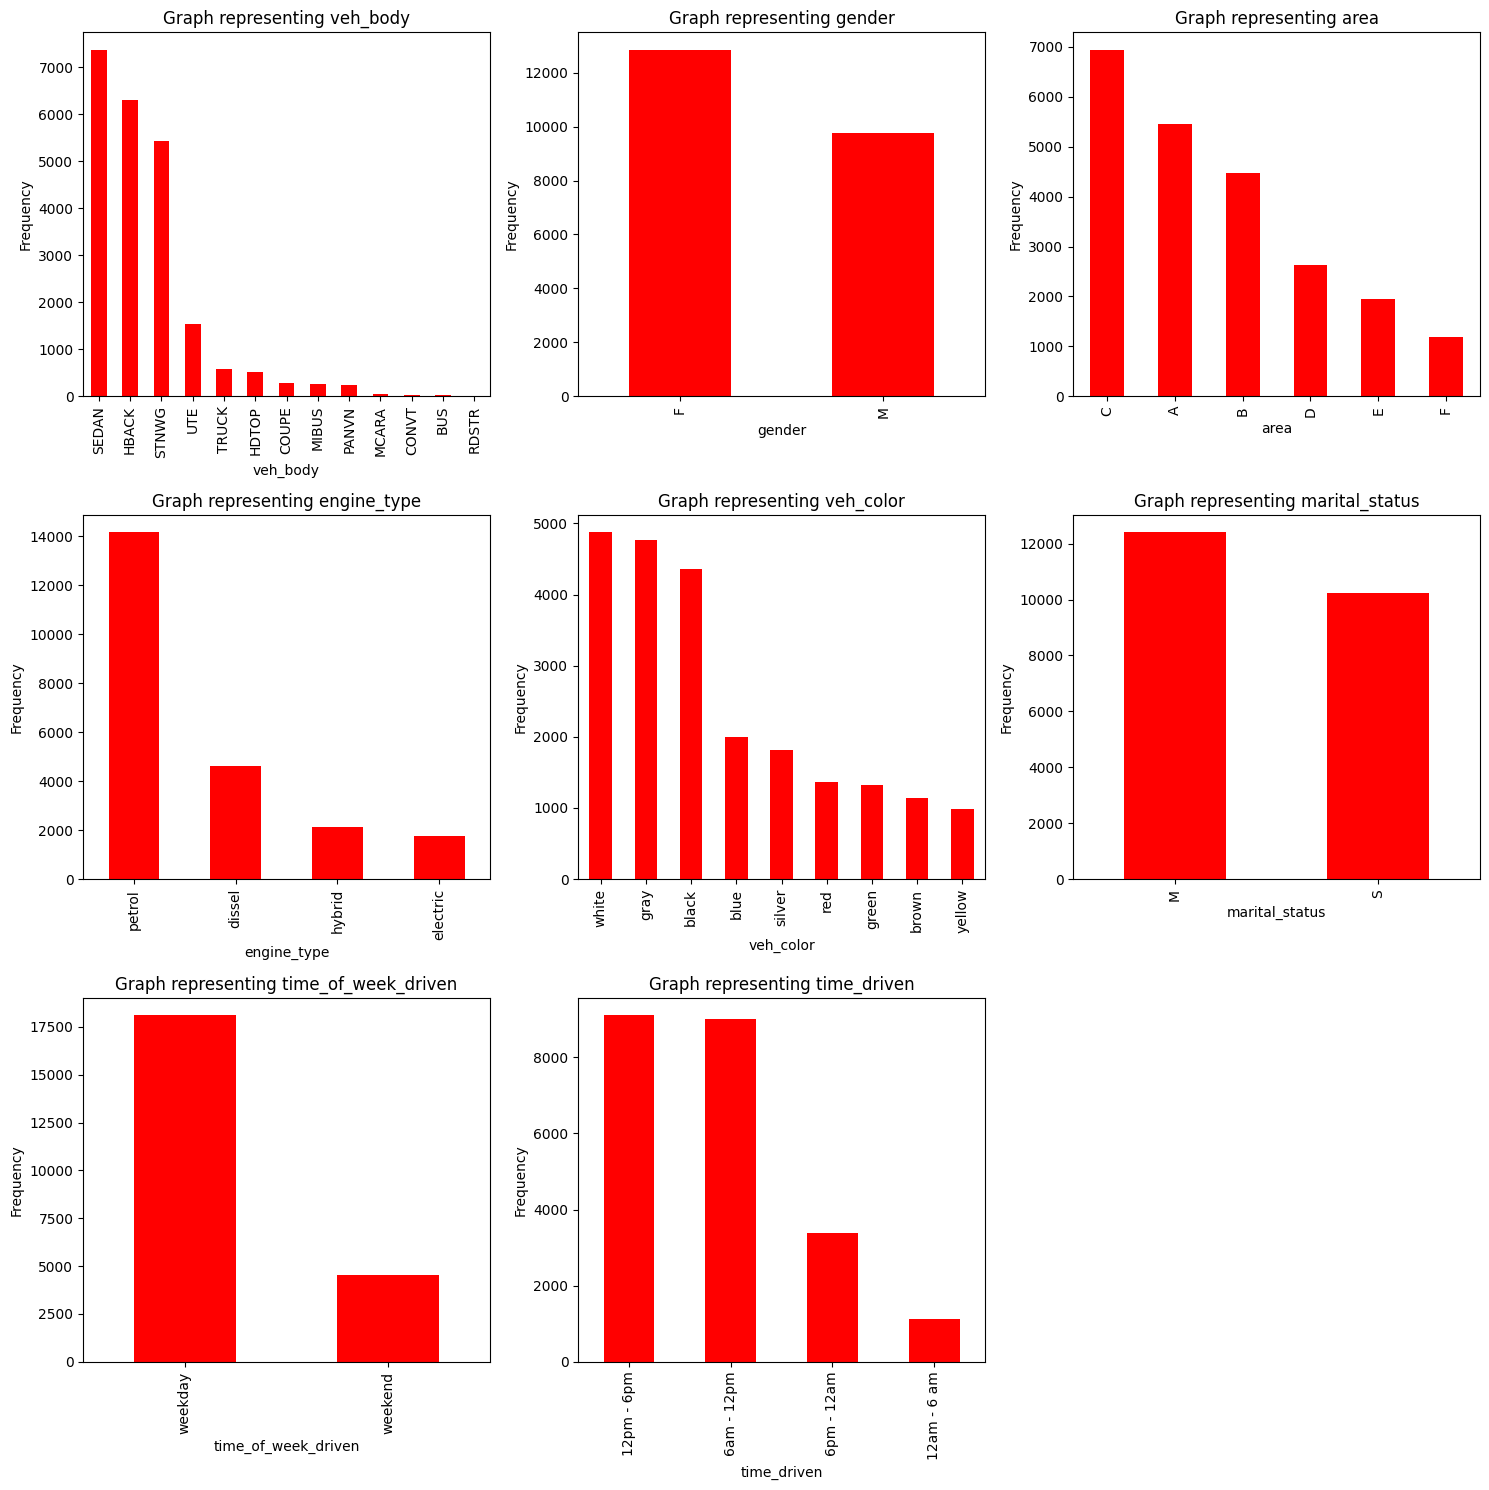

In [39]:
# for i in categorical_col:
#   df_train[i].value_counts().plot(kind='bar')
#   plt.title(f'Graph representing {i}')
#   plt.show()

num_cols = len(categorical_col)
num_rows = num_cols // 3 + (num_cols % 3 > 0)  # Determine the number of rows needed for 3 columns
fig, axes = plt.subplots(num_rows, 3, figsize=(15, num_rows * 5))  # Width, Height of the entire grid of plots

# Flatten the axes array for easy iteration
axes = axes.flatten()

for i, col in enumerate(categorical_col):
    # Plot the bar plot on ith subplot
    df_train[col].value_counts().plot(kind='bar', ax=axes[i], color='red')
    axes[i].set_title(f'Graph representing {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# If there are any leftover subplots, turn them off
for j in range(i + 1, num_rows * 3):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

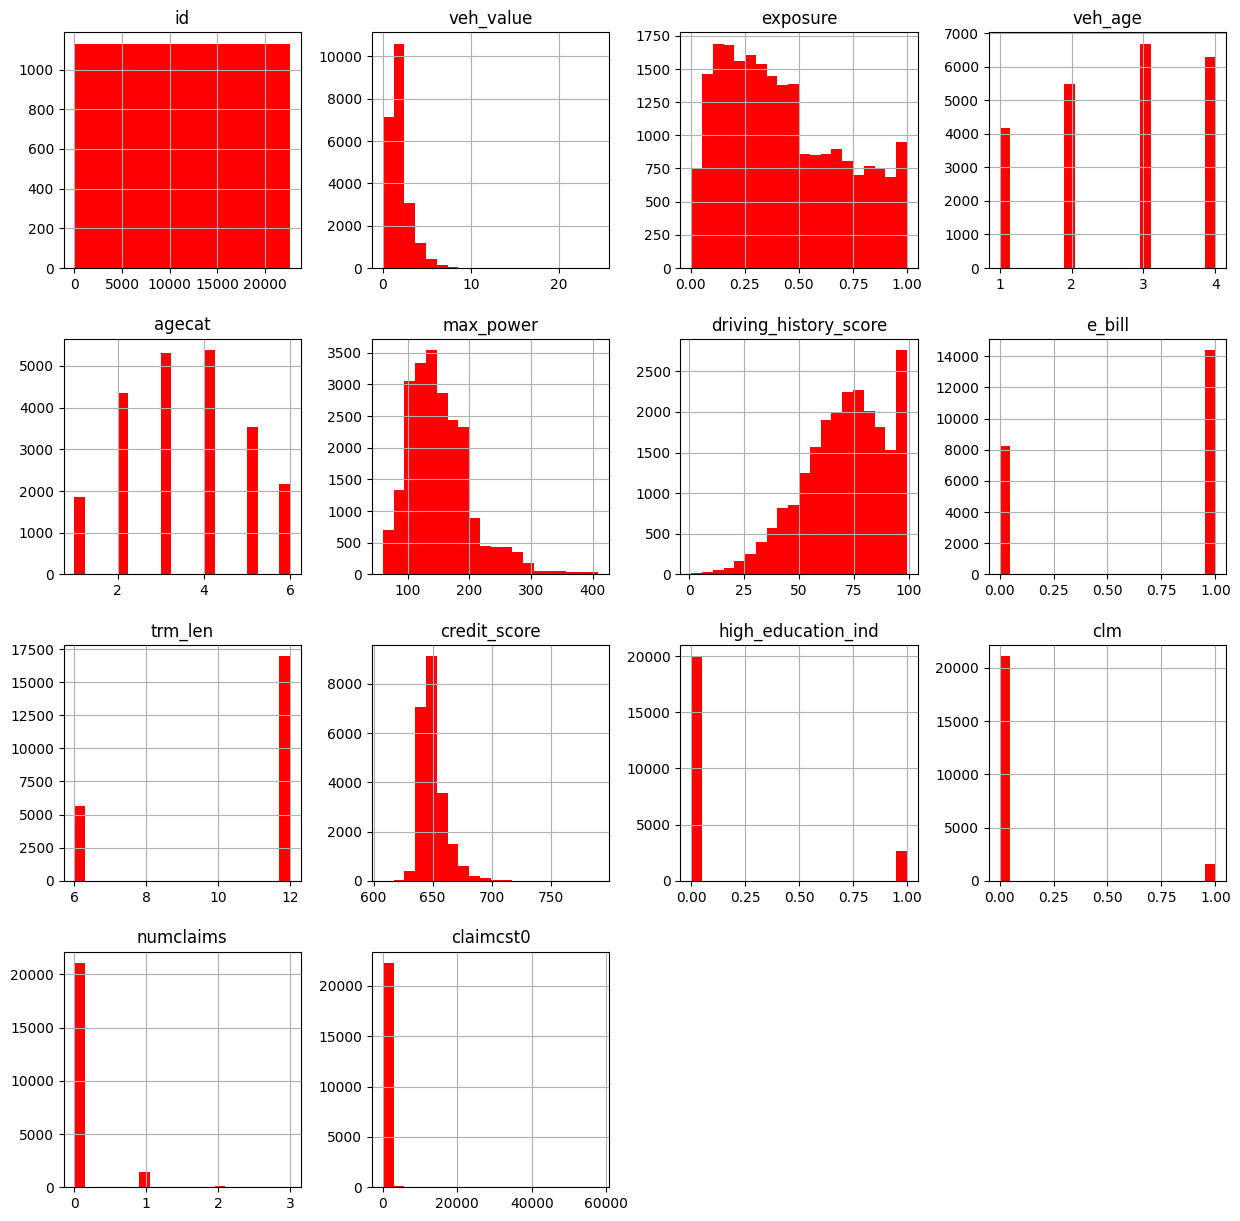

In [40]:
df_train.hist(bins=20,figsize=(15,15),color='red')
plt.show()

In [41]:
# Method to calculate memory usage in bytes for each column
df_train.memory_usage()

Index                       128
id                       180952
veh_value                180952
exposure                 180952
veh_body                 180952
veh_age                  180952
gender                   180952
area                     180952
agecat                   180952
engine_type              180952
max_power                180952
driving_history_score    180952
veh_color                180952
marital_status           180952
e_bill                   180952
time_of_week_driven      180952
time_driven              180952
trm_len                  180952
credit_score             180952
high_education_ind       180952
clm                      180952
numclaims                180952
claimcst0                180952
dtype: int64

In [42]:
# Code to remove columns with less dependency on target variable
df_train_updated = df_train.drop(columns=['id','max_power','driving_history_score','e_bill','trm_len','credit_score','high_education_ind'],axis=1)
df_test_updated = df_test.drop(columns =['id','max_power','driving_history_score','e_bill','trm_len','credit_score','high_education_ind'],axis=1)

# Data Encoding
1. Label Encoder
2. One -  hot Encoding

In [43]:
# Encoding Categorical Data using Label Encoder
label_encoder = LabelEncoder()
df_train_encoded = df_train.copy()
df_test_encoded = df_test.copy()

for col in categorical_col:
  df_train_encoded[col] = label_encoder.fit_transform(df_train[col])
  df_test_encoded[col] = label_encoder.fit_transform(df_test[col])

# Encoding Data using One Hot Encoder
# df_train_encoded = pd.get_dummies(df_train_updated, columns=categorical_col)
# df_test_encoded = pd.get_dummies(df_test_updated, columns = categorical_col)

In [44]:
# Encoded training data with top 5 rows
df_train_encoded.head()

,id,veh_value,exposure,veh_body,veh_age,gender,area,agecat,engine_type,max_power,...,marital_status,e_bill,time_of_week_driven,time_driven,trm_len,credit_score,high_education_ind,clm,numclaims,claimcst0
0,1,0.77,0.444504,9,4,1,3,3,3,147,...,1,1,0,3,6,640.448137,1.0,0,0,0.0
1,2,4.45,0.562183,10,1,1,0,3,3,158,...,1,1,0,2,12,683.749691,0.0,0,0,0.0
2,3,4.90,0.465244,10,1,0,0,3,3,159,...,0,1,0,3,6,653.656117,1.0,0,0,0.0
3,4,0.48,0.271039,7,4,1,0,4,3,80,...,1,1,0,1,12,642.574671,0.0,0,0,0.0
4,5,0.85,0.141624,9,4,0,0,5,3,126,...,1,0,0,2,6,647.175035,0.0,0,0,0.0


In [45]:
# Encoded test data with top 5 rows
df_test_encoded.head()

,id,veh_value,exposure,veh_body,veh_age,gender,area,agecat,engine_type,max_power,driving_history_score,veh_color,marital_status,e_bill,time_of_week_driven,time_driven,trm_len,credit_score,high_education_ind
0,1,3.40,0.076279,10,2,1,1,4,3,174,83,0,1,1,0,3,6,648.247594,0
1,2,2.55,0.093443,10,2,0,0,3,3,181,65,8,0,0,0,0,12,637.752677,0
2,3,3.04,0.157762,10,2,0,4,4,3,136,64,7,1,1,0,1,12,661.483786,0
3,4,2.05,0.560735,6,4,1,2,6,0,164,82,3,0,1,0,2,12,647.846365,0
4,5,1.93,0.258275,3,2,1,2,4,0,89,48,0,1,0,0,2,12,640.257550,0


In [46]:
# #Dropping Categorical Variables from training and testing data
# df_train_encoded = df_train_encoded.drop(columns=categorical_col, axis=1)
# df_test_encoded = df_test_encoded.drop(columns=categorical_col, axis=1)

In [47]:
# Taking only the columns which are important for analysis
df_train_updated = df_train_encoded[['exposure','agecat','trm_len','time_of_week_driven','driving_history_score','engine_type','time_driven','gender','marital_status']]
df_test_updated = df_test_encoded[['exposure','agecat','trm_len','time_of_week_driven','driving_history_score','engine_type','time_driven','gender','marital_status']]

In [48]:
# Creating predicted and predictor variables
y = df_train_encoded['claimcst0']  # Predicted Variable
X = df_train_encoded.drop(columns=['id','claimcst0','clm','numclaims'], axis=1) # Predicting Variable

# Feature Selection and Scaling

In [49]:
X_updated = X[['exposure','agecat','trm_len','time_of_week_driven','driving_history_score','engine_type','time_driven','gender','marital_status']]

In [50]:
# Selecting the top 10 features based on mutual information score
X_new = SelectKBest(score_func=mutual_info_regression, k=8).fit(X,y)
print(X_new.get_support())


[False  True False False  True False  True False False False False  True
  True  True False False  True  True]


In [51]:
print(X.columns[X_new.get_support()])

Index(['exposure', 'gender', 'agecat', 'marital_status', 'e_bill',
       'time_of_week_driven', 'credit_score', 'high_education_ind'],
      dtype='object')


In [52]:
X_train, X_test, y_train, y_test = train_test_split(X_updated,y,random_state=42, test_size=0.3)

Feature 0: 0.007491
Feature 1: 0.005162
Feature 2: 0.000000
Feature 3: 0.000000
Feature 4: 0.009092
Feature 5: 0.003499
Feature 6: 0.003831
Feature 7: 0.000000
Feature 8: 0.001913


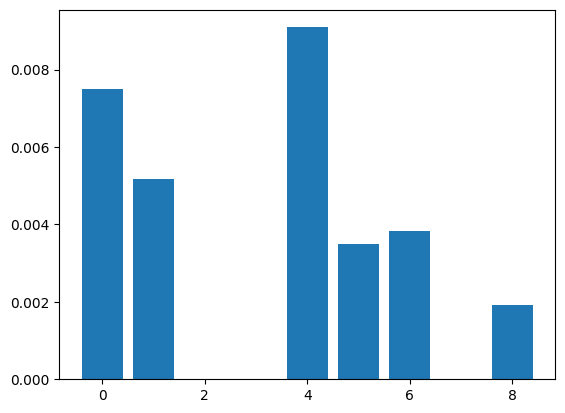

In [53]:
from matplotlib import pyplot
def select_features(X_train, y_train, X_test):
 # configure to select all features
 fs = SelectKBest(score_func=mutual_info_regression, k='all')
 # learn relationship from training data
 fs.fit(X_train, y_train)
 # transform train input data
 X_train_fs = fs.transform(X_train)
 # transform test input data
 X_test_fs = fs.transform(X_test)
 return X_train_fs, X_test_fs, fs

X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
for i in range(len(fs.scores_)):
 print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [54]:
print("Shape of Trainig Predicting Data : ", X_train.shape)
print("Shape of Testing Predicting Data : ",X_test.shape)
print("Shape of Training Predictor Data : ",y_train.shape)
print("Shape of Testing Predictor Data : ",y_test.shape)

Shape of Trainig Predicting Data :  (15833, 9)
Shape of Testing Predicting Data :  (6786, 9)
Shape of Training Predictor Data :  (15833,)
Shape of Testing Predictor Data :  (6786,)


In [55]:
# For Label Encoder
# X_train_updated = X_train.drop(columns=['max_power','driving_history_score','e_bill','trm_len','credit_score','high_education_ind'], axis=1)
# X_test_updated = X_test.drop(columns=['max_power','driving_history_score','e_bill','trm_len','credit_score','high_education_ind'],axis=1)

Feature Scaling
1. Standard Scaler
2. Robust Scaler
3. MinMax Scaler
4. Power Transformer

In [56]:
# # Standard Scaler
# SC_scaler = StandardScaler()
# X_train_scaled = SC_scaler.fit_transform(X_train)
# X_test_scaled = SC_scaler.transform(X_test)

# # Robust Scaler
# RB_scaler = RobustScaler()
# X_train_scaled = RB_scaler.fit_transform(X_train)
# X_test_scaled = RB_scaler.transform(X_test)

# # Min-Max scaler
# Min_Max_scaler = MinMaxScaler()
# X_train_scaled = Min_Max_Scaler.fit_transform(X_train)
# X_test_scaled = Min_Max_Scaler.transform(X_test)

# Power Transformer
PT = PowerTransformer()
X_train_scaled = PT.fit_transform(X_train)
X_test_scaled = PT.transform(X_test)


# Modelling
I used scaled data on modeling part

1. Linear Regression

In [57]:
LR = LinearRegression()
#LR.fit(X_train_scaled,y_train)
LR.fit(X_train_scaled,y_train)
y_train_pred = LR.predict(X_train_scaled)
y_pred_LR = LR.predict(X_test_scaled)
mean_error_LR = mean_squared_error(y_test, y_pred_LR)
R2_Score_LR = r2_score(y_test,y_pred_LR)

print("Mean-squared error for Linear regression is : ",mean_error_LR)
print("R-2 Score for Linear Regression is : ", R2_Score_LR)

Mean-squared error for Linear regression is :  1630785.1299021915
R-2 Score for Linear Regression is :  0.002698626957398198


2. Decision Tree Regressor

In [58]:
DT = DecisionTreeRegressor(max_depth =8,min_samples_split=3,min_samples_leaf=5,random_state=42)
DT.fit(X_train_scaled,y_train)
y_pred = DT.predict(X_test_scaled)

mean_error_DT = mean_squared_error(y_test, y_pred)
print("Mean squared error for Decision Tree Regressor is : ", mean_error_DT)

Mean squared error for Decision Tree Regressor is :  1717281.2692715346


3. Random Forest Regressor

In [59]:
RF = RandomForestRegressor(n_estimators = 200,random_state=42, max_depth=8, min_samples_leaf=10)
RF.fit(X_train_scaled,y_train)
y_pred = RF.predict(X_test_scaled)
mean_error_RF = mean_squared_error(y_test,y_pred)

print("Mean-Squared error for Random Forest Regressor is : ", mean_error_RF)


Mean-Squared error for Random Forest Regressor is :  1641152.7054631037


In [60]:
cols = ['max_power','driving_history_score','e_bill','trm_len','credit_score','high_education_ind']

4. Gradient Boosting Regressor

In [61]:
GB = GradientBoostingRegressor(n_estimators = 10,random_state=42, max_depth=8, min_samples_leaf=10)
GB.fit(X_train_scaled,y_train)
y_pred = GB.predict(X_test_scaled)
mean_error_GB = mean_squared_error(y_test,y_pred)

print("Mean-Squared error for Random Forest Regressor is : ", mean_error_GB)

Mean-Squared error for Random Forest Regressor is :  1649701.575472029


5. LightGBM Regressor





In [62]:
gbm = lgb.LGBMRegressor()
gbm.fit(X_train_scaled, y_train)
y_pred = gbm.predict(X_test_scaled, num_iteration=gbm.best_iteration_)
mean_error_gbm = mean_squared_error(y_test, y_pred)
print(mean_error_gbm)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001596 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 382
[LightGBM] [Info] Number of data points in the train set: 15833, number of used features: 9
[LightGBM] [Info] Start training from score 160.464586
1689565.873071848


6. CatBoost Regressor

In [63]:
CB= cb.CatBoostRegressor(iterations=1000,random_state=42)
CB.fit(X_train_scaled,y_train)
y_pred = CB.predict(X_test_scaled)
mean_error_CB= mean_squared_error(y_test, y_pred)
print(mean_error_CB)




Learning rate set to 0.063345
0:	learn: 1267.0394164	total: 65.6ms	remaining: 1m 5s
1:	learn: 1266.5095603	total: 70.7ms	remaining: 35.3s
2:	learn: 1264.6619363	total: 81.1ms	remaining: 27s
3:	learn: 1264.4195023	total: 87.8ms	remaining: 21.9s
4:	learn: 1263.1397384	total: 94.7ms	remaining: 18.8s
5:	learn: 1262.7585972	total: 105ms	remaining: 17.5s
6:	learn: 1262.5029909	total: 132ms	remaining: 18.7s
7:	learn: 1262.1784015	total: 149ms	remaining: 18.5s
8:	learn: 1261.5405901	total: 160ms	remaining: 17.6s
9:	learn: 1260.9278676	total: 175ms	remaining: 17.3s
10:	learn: 1260.5509902	total: 185ms	remaining: 16.6s
11:	learn: 1258.1006857	total: 197ms	remaining: 16.2s
12:	learn: 1258.0567550	total: 213ms	remaining: 16.2s
13:	learn: 1257.5727594	total: 228ms	remaining: 16s
14:	learn: 1257.1125768	total: 243ms	remaining: 16s
15:	learn: 1256.5734426	total: 276ms	remaining: 17s
16:	learn: 1256.2703295	total: 292ms	remaining: 16.9s
17:	learn: 1255.8805859	total: 315ms	remaining: 17.2s
18:	learn: 

7. Support Vector Regressor


In [64]:
SV = SVR (kernel='rbf', C=2)
SV.fit(X_train_scaled, y_train)
y_pred = SV.predict(X_test_scaled)
mean_error_SV= mean_squared_error(y_test, y_pred)
print("Mean Squared Error for Support Vector Regressor : ",mean_error_SV)


Mean Squared Error for Support Vector Regressor :  1663752.3423245566


8. Elastic Net Regressor

In [65]:
ER = ElasticNet(alpha = 2,l1_ratio=1,random_state=42)
ER.fit(X_train_scaled, y_train)
y_pred = ER.predict(X_test_scaled)
mean_error_ER= mean_squared_error(y_test, y_pred)
print("Mean Squared Error for Elastic Net Regressor : ",mean_error_ER)


Mean Squared Error for Elastic Net Regressor :  1630786.6371990612


9. Elastic Net CV

In [66]:
EN_regr = ElasticNetCV(n_alphas=2, l1_ratio=1, cv=5, random_state=42)
EN_regr.fit(X_train_scaled,y_train)
y_pred = EN_regr.predict(X_test_scaled)
mean_error_EN= mean_squared_error(y_test, y_pred)
print("Mean Squared Error for Elastic Net CV Regressor : ",mean_error_EN)


Mean Squared Error for Elastic Net CV Regressor :  1630784.1302501005


10. Ridge Regression

In [67]:
RR = Ridge(alpha=159.98)
RR.fit(X_train_scaled,y_train)
y_pred = RR.predict(X_test_scaled)
mean_error_Ridge= mean_squared_error(y_test, y_pred)
print("Mean Squared Error for Ridge Regressor : ",mean_error_Ridge)

Mean Squared Error for Ridge Regressor :  1630794.1796139183


11. Lasso Regression

In [68]:
Lasso_R = Lasso(alpha=1)
Lasso_R.fit(X_train_scaled,y_train)
y_pred = Lasso_R.predict(X_test_scaled)
mean_error_Lasso= mean_squared_error(y_test, y_pred)
print("Mean Squared Error for Lasso Regressor : ",mean_error_Lasso)

Mean Squared Error for Lasso Regressor :  1630775.0535145714


In [69]:
# Addition of result accuracy to a dictionary to get the best accuracy
d={}
d['Linear Regression'] = mean_error_LR
d['Decision Tree'] = mean_error_DT
d['Random Forest'] = mean_error_RF
d['Gradient Boosting'] = mean_error_GB
d['Light Gradient Boosting'] = mean_error_gbm
d['Cat Boost'] = mean_error_CB
d['Support Vector'] = mean_error_SV
d['Elastic Net'] =  mean_error_ER
d['Elastic Net CV'] = mean_error_EN
d['Ridge'] = mean_error_Ridge
d['Lasso Regression'] = mean_error_Lasso

In [70]:

print(d)

{'Linear Regression': 1630785.1299021915, 'Decision Tree': 1717281.2692715346, 'Random Forest': 1641152.7054631037, 'Gradient Boosting': 1649701.575472029, 'Light Gradient Boosting': 1689565.873071848, 'Cat Boost': 1992873.1193866853, 'Support Vector': 1663752.3423245566, 'Elastic Net': 1630786.6371990612, 'Elastic Net CV': 1630784.1302501005, 'Ridge': 1630794.1796139183, 'Lasso Regression': 1630775.0535145714}


In [71]:
# Model prediction for the test data
# Change Scaling Method here
df_test_copy = df_test_encoded.copy()
df_test_copy = df_test_copy[['exposure','agecat','trm_len','time_of_week_driven','driving_history_score','engine_type','time_driven','gender','marital_status']]
df_test_copy_scaled = PT.transform(df_test_copy)
#df_test_pca = pca.transform(df_test_copy)
y_pred_final = LR.predict(df_test_copy_scaled)

print(y_pred_final)
print(len(y_pred_final))
final_df = pd.DataFrame({'id':df_test['id'],'Predict':y_pred_final})
csv_file_path = r'C:\Users\ASUS\Downloads\final.csv'
final_df.to_csv(csv_file_path, index=False)


[124.08731655  53.89839385  23.3907745  ... 259.27472814 229.37401652
 269.14140993]
22620


In [72]:



print(y_pred_final)
print(len(y_pred_final))
final_df = pd.DataFrame({'id':df_test['id'],'Predict':y_pred_final})
csv_file_path = r'C:\Users\ASUS\Downloads\final.csv'
final_df.to_csv(csv_file_path, index=False)

[124.08731655  53.89839385  23.3907745  ... 259.27472814 229.37401652
 269.14140993]
22620


#Hyper-Parameter Tuning for Ridge and Lasso Regression

In [73]:
#  Ridge and Lasso Regression, Elastic Net and Elastic Net CV
alpha_range = np.logspace(-4, 4, 50)
ridge_param_grid = {'alpha': alpha_range}
Lasso_param_grid = {'alpha': alpha_range}

# Grid Search for Ridge Regression
ridge_grid_search = GridSearchCV(Ridge(),ridge_param_grid, cv=5, scoring='neg_mean_squared_error')
ridge_grid_search.fit(X_train, y_train)


# Grid Search for Lasso Regression
lasso_grid_search = GridSearchCV(Lasso(),Lasso_param_grid, cv=5, scoring='neg_mean_squared_error')
lasso_grid_search.fit(X_train, y_train)

# Best parameters and best score for Ridge
ridge_best_params = ridge_grid_search.best_params_
ridge_best_score = ridge_grid_search.best_score_

lasso_best_params = lasso_grid_search.best_params_
lasso_best_score = lasso_grid_search.best_score_

print("Ridge: ", ridge_best_params, ridge_best_score)

print("Lasso : ",lasso_best_params, lasso_best_score)





Ridge:  {'alpha': 159.98587196060572} -1607461.448256644
Lasso :  {'alpha': 0.05963623316594643} -1607535.4614882558


#Hyper-Parameter Tuning for Decision Tree

In [74]:
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 6, 8],
    'max_features': [None, 'auto', 'sqrt', 'log2']
}


tree_grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid, cv=5,
                                         scoring='neg_mean_squared_error', n_jobs=-1)
tree_grid_search.fit(X_train, y_train)
tree_best_params = tree_grid_search.best_params_
tree_best_score = tree_grid_search.best_score_

print(tree_best_params,tree_best_score)


{'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 8, 'min_samples_split': 20} -1724738.6547137059


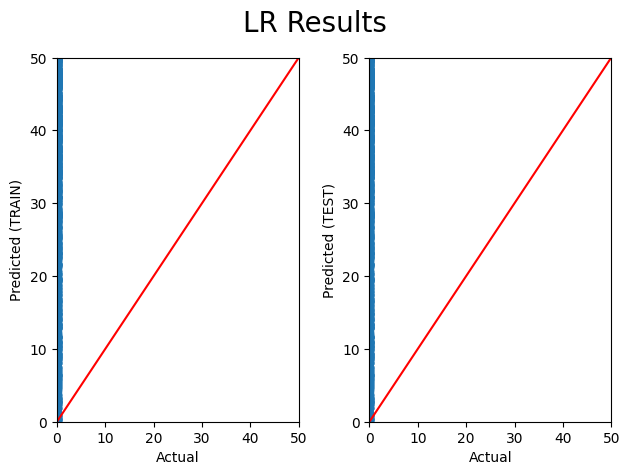

In [75]:
fig, axes = plt.subplots(1,2)





fig.suptitle("LR Results", fontsize=20)


axes[0].scatter(x=y_train, y=y_train_pred)
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted (TRAIN)",  fontsize=10)

axes[0].set_xlim(0,50)
axes[0].set_ylim(0,50)

x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')


axes[1].scatter(x=y_train, y=y_train_pred)
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted (TEST)",  fontsize=10)

axes[1].set_xlim(0,50)
axes[1].set_ylim(0,50)

x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')

# tight layout
fig.tight_layout()


fig.subplots_adjust(top=0.88)

# show the plot
plt.show()

# Feature Importance  

In [76]:
from sklearn.inspection import permutation_importance

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/usr

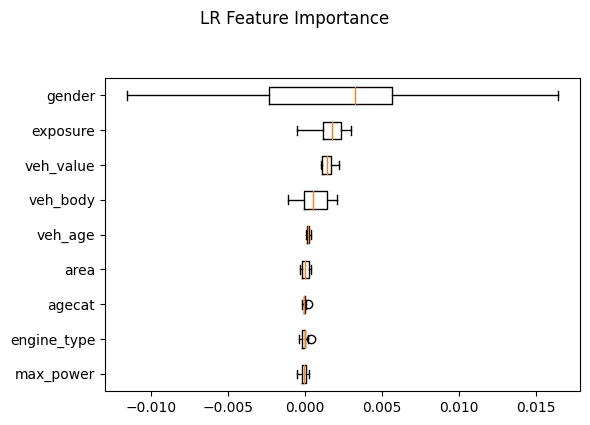

In [77]:
clf = LR

result = permutation_importance(clf, X_test, y_test, n_repeats=10,
                                random_state=42)
perm_sorted_idx = result.importances_mean.argsort()

fig, ax1 = plt.subplots(1, 1, figsize=(6, 4))
ax1.boxplot(result.importances[perm_sorted_idx].T, vert=False,
            labels=X.columns[perm_sorted_idx])
fig.suptitle('LR Feature Importance', y=1.05)
fig.tight_layout()
plt.show()

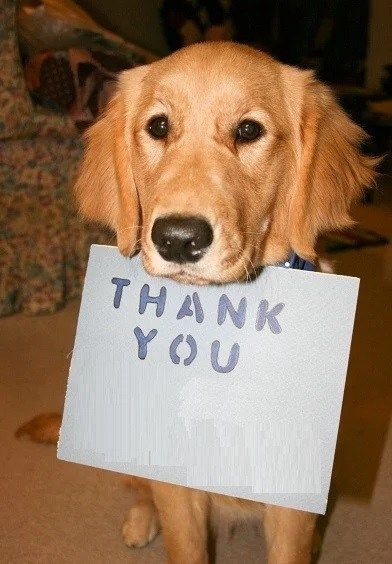